# Equity Investing -  Fundamental Analysis

1. Scraping key statistical data of Nifty 500 stocks
2. Filter based on fundamentals

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-fundamental-data" data-toc-modified-id="Get-fundamental-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get fundamental data</a></span></li><li><span><a href="#Nifty-500-sector-breakdown" data-toc-modified-id="Nifty-500-sector-breakdown-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nifty 500 sector breakdown</a></span></li><li><span><a href="#Filter-based-on-fundamentals" data-toc-modified-id="Filter-based-on-fundamentals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filter based on fundamentals</a></span></li><li><span><a href="#Visualize-selected-stocks" data-toc-modified-id="Visualize-selected-stocks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize selected stocks</a></span></li></ul></div>

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sns.set_context('talk')
matplotlib.rcParams['font.family'] = 'arial'

## Get fundamental data

In [3]:
df = pd.read_csv('data/nifty_500_stats.csv', 
                              sep=';', 
                              encoding='utf-8', 
                              thousands=',',
                              na_values='None'
                             )
del df['Unnamed: 0']
df['price_bookvalue'] = np.round(df.current_value / df.book_value, 2)
df['peg3'] = df.price_earnings / df.sales_growth_3yr

display(df.info())
df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
company             500 non-null object
industry            500 non-null object
symbol              500 non-null object
category            500 non-null object
market_cap          500 non-null float64
current_value       500 non-null float64
high_52week         497 non-null float64
low_52week          497 non-null float64
book_value          500 non-null float64
price_earnings      455 non-null float64
dividend_yield      500 non-null float64
roce                500 non-null float64
roe                 498 non-null float64
sales_growth_3yr    491 non-null float64
price_bookvalue     500 non-null float64
peg3                447 non-null float64
dtypes: float64(12), object(4)
memory usage: 62.6+ KB


None

,company,industry,symbol,category,market_cap,current_value,high_52week,low_52week,book_value,price_earnings,dividend_yield,roce,roe,sales_growth_3yr,price_bookvalue,peg3
69,General Insurance Corporation of India,FINANCIAL SERVICES,GICRE,Nifty Next 50,57307.0,326.65,424.31,299.9,128.10,15.85,2.07,8.19,7.83,41.11,2.55,0.385551
93,Shriram Transport Finance Co. Ltd.,FINANCIAL SERVICES,SRTRANSFIN,Nifty Next 50,28451.0,1254.00,1670.60,903.5,641.73,16.43,0.88,10.90,12.40,12.42,1.95,1.322866
42,Tech Mahindra Ltd.,IT,TECHM,Nifty 50,67778.0,690.90,780.05,458.5,202.89,16.62,2.02,25.85,21.06,7.28,3.41,2.282967


In [4]:
df = df.fillna(0)

In [5]:
ind_ratio = pd.DataFrame(df.groupby('industry')['price_earnings'].quantile(.8)).reset_index()
ind_ratio = ind_ratio.rename(columns = {'price_earnings': 'ind_pe80'})
df = pd.merge(df, ind_ratio,  how='left', left_on=['industry'], right_on = ['industry'])

# Above avg ROCE and ROE
ind_ratio = pd.DataFrame(df.groupby('industry')['roce', 'roe'].mean()).reset_index()
ind_ratio = ind_ratio.rename(columns = {'roce': 'ind_roce50',
                                       'roe': 'ind_roe50'})
df = pd.merge(df, ind_ratio,  how='left', left_on=['industry'], right_on = ['industry'])

## Nifty 500 sector breakdown

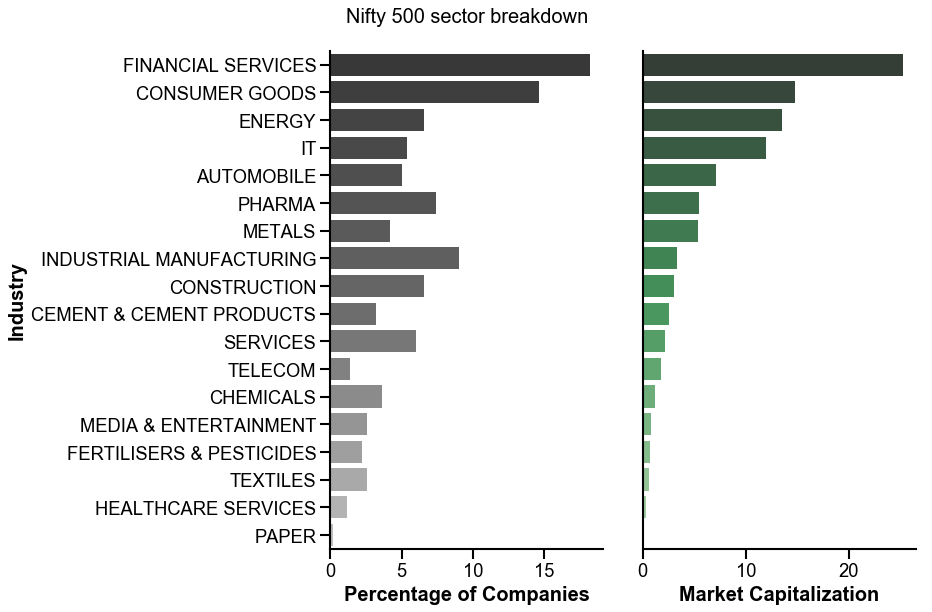

In [6]:
f = {'market_cap':['sum'], 'company':['count']}

industries = df.groupby('industry').agg(f)
industries.columns = industries.columns.get_level_values(0)
industries = industries.reset_index()
industries['company'] = 100*industries['company'] / industries['company'].sum()
industries['market_cap'] = 100*industries['market_cap'] / industries['market_cap'].sum()
industries = industries.sort_values('market_cap', ascending=False)

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x="company", y="industry", data=industries, palette=("Greys_d"))
ax1.set_xlabel('Percentage of Companies', weight='bold')
ax1.set_ylabel('Industry', weight = 'bold')
ax1.set_title('Nifty 500 sector breakdown\n')

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x="market_cap", y="industry", data=industries, palette=("Greens_d"))
ax2.set_xlabel('Market Capitalization', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

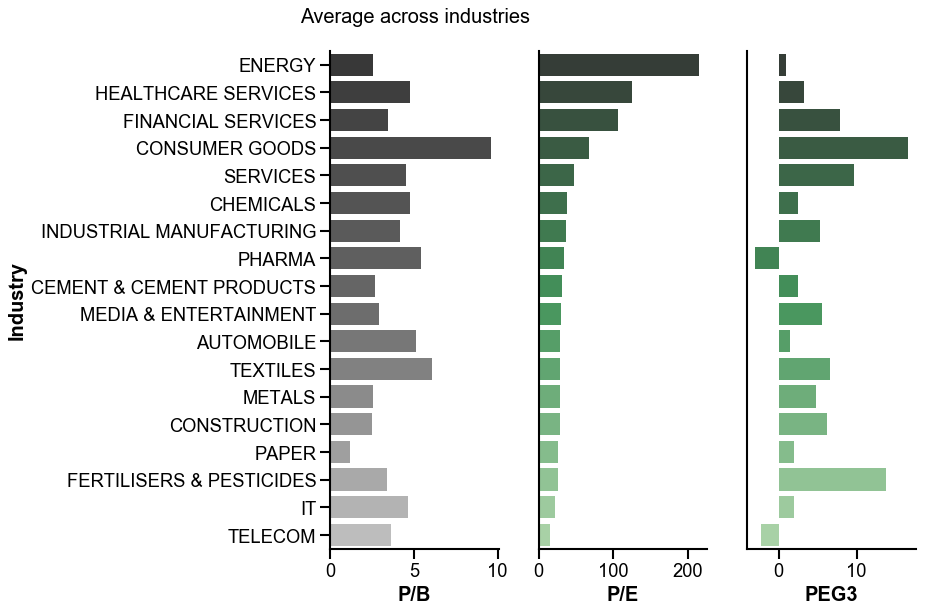

In [7]:
f = {'price_bookvalue':['mean'], 'price_earnings':['mean'], 'peg3':['mean']}

ratios = df.groupby('industry').agg(f)
ratios.columns = ratios.columns.get_level_values(0)
ratios = ratios.reset_index()
ratios = ratios.sort_values('price_earnings', ascending=False)

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)
ax1 = sns.barplot(x="price_bookvalue", y="industry", data=ratios, palette=("Greys_d"))
ax1.set_xlabel('P/B', weight='bold')
ax1.set_ylabel('Industry', weight = 'bold')
ax1.set_title('Average across industries\n')

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x="price_earnings", y="industry", data=ratios, palette=("Greens_d"))
ax2.set_xlabel('P/E', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x="peg3", y="industry", data=ratios, palette=("Greens_d"))
ax2.set_xlabel('PEG3', weight='bold')
ax2.set_ylabel('')
ax2.set_yticks([])

sns.despine()
plt.tight_layout();

## Filter based on fundamentals

In [8]:
df_1 = df.copy()
print('Total:', df_1.shape[0])
print('\n')

df_filter = df_1[(df_1.price_bookvalue > 0)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print('P/B > 0 :', df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

# P/E > 0%
df_1 = df_filter.copy()
df_filter = df_1[(df_1.price_earnings > 0)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print('P/E > 0 :', df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

df_1 = df_filter.copy()
df_filter = df_1[(df_1.peg3 > 0)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print('P/E to Sales growth in 3yrs > 0 :', df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

df_1 = df_filter.copy()
df_filter = df_1[(df_1.price_bookvalue <= df.price_bookvalue.quantile(.8))]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print('P/B <= 80 precentile of Nifty 500 :', df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

# P/E <= 80 percentile of Industry
df_1 = df_filter.copy()
df_filter = df_1[(df_1.price_earnings <= df_1.ind_pe80)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print('P/E <= 80 precentile of Industry :', df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

# Above avg ROCE
df_1 = df_filter.copy()
df_filter = df_1[(df_1.roce > df_1.ind_roce50)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print("ROCE above Industry's average :", df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

# Above avg ROE
df_1 = df_filter.copy()
df_filter = df_1[(df_1.roe > df_1.ind_roe50)]
removed = list(set(df_1.symbol) - set(df_filter.symbol))

print("ROE above Industry's average :", df_filter.shape[0])
print('Removed: ', len(removed))
print(removed)
print('\n')

df_1 = df_filter.copy()

Total: 500


P/B > 0 : 498
Removed:  2
['JETAIRWAYS', 'RNAVAL']


P/E > 0 : 455
Removed:  43
['IOB', 'BHARTIARTL', 'BANKINDIA', 'BANKBARODA', 'ADANIPOWER', 'DEN', 'GESHIP', 'RPOWER', 'IDEA', 'INOXWIND', 'JPASSOCIAT', 'ALBK', 'SBIN', 'UNIONBANK', 'SCI', 'JPPOWER', 'ANDHRABANK', 'UCOBANK', 'IL&FSTRANS', 'NETWORK18', 'ITDC', 'IFCI', 'RCOM', 'LAKSHVILAS', 'PNB', 'SPARC', 'COFFEEDAY', 'ORIENTBANK', 'IDBI', 'BBTC', 'IBREALEST', 'CANBK', 'DENABANK', 'SUZLON', 'GMRINFRA', 'HCL-INSYS', 'CENTRALBK', 'RENUKA', 'SYNDIBANK', 'IDFCBANK', 'UJJIVAN', 'INFIBEAM', 'ASTERDM']


P/E to Sales growth in 3yrs > 0 : 392
Removed:  63
['EIDPARRY', 'DREDGECORP', 'COROMANDEL', 'HEIDELBERG', 'TATAPOWER', 'RELIANCE', 'KSCL', 'JAICORPLTD', 'GODFRYPHLP', 'TIINDIA', 'JSWENERGY', 'RCF', 'GUJGASLTD', 'SPTL', 'MAXINDIA', 'DCAL', 'GEPIL', 'PRAJIND', 'VINATIORGA', 'BLISSGVS', 'MFSL', 'RELCAPITAL', 'IBVENTURES', 'BANDHANBNK', 'RAJESHEXPO', 'PETRONET', 'GAIL', 'GPPL', 'DRREDDY', 'BATAINDIA', 'BALMLAWRIE', 'NMDC', 'FSL', 'BPC

In [9]:
del df_1['ind_pe80']
del df_1['ind_roce50']
del df_1['ind_roe50']

## Visualize selected stocks

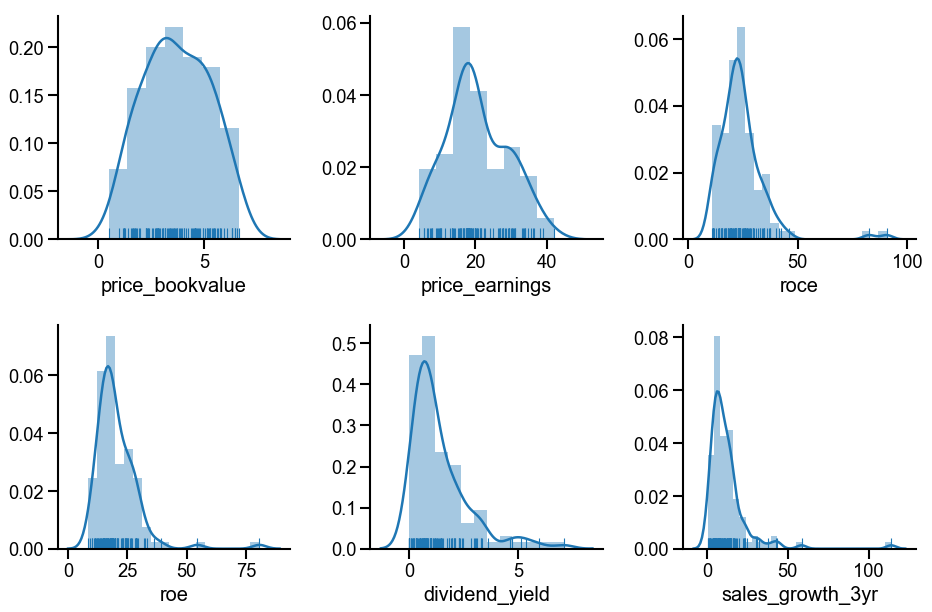

In [10]:
from scipy.stats import norm

fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 3, 1)
ax1 = sns.distplot(df_1.price_bookvalue, rug=True, kde=True) 

plt.subplot(2, 3, 2)
ax2 = sns.distplot(df_1.price_earnings, rug=True, kde=True) 

plt.subplot(2, 3, 3)
ax3 = sns.distplot(df_1.roce, rug=True, kde=True) 

plt.subplot(2, 3, 4)
ax4 = sns.distplot(df_1.roe, rug=True, kde=True) 

plt.subplot(2, 3, 5)
ax5 = sns.distplot(df_1.dividend_yield, rug=True, kde=True) 

plt.subplot(2, 3, 6)
ax6 = sns.distplot(df_1.sales_growth_3yr, rug=True, kde=True) 

sns.despine()
plt.tight_layout();

In [11]:
df_1.groupby('category')['company'].size()

category
Nifty 50              11
Nifty Midcap 150      35
Nifty Next 50         10
Nifty Smallcap 250    52
Name: company, dtype: int64

In [12]:
# Nifty 50 
df_1[(df_1.category == 'Nifty 50')].symbol.values

array(['ADANIPORTS', 'BAJAJ-AUTO', 'INFRATEL', 'CIPLA', 'HCLTECH',
       'HEROMOTOCO', 'HINDPETRO', 'IBULHSGFIN', 'INFY', 'JSWSTEEL',
       'TECHM'], dtype=object)

In [13]:
# Nifty 50 
df_1[(df_1.category == 'Nifty Next 50')].symbol.values

array(['ACC', 'ASHOKLEY', 'AUROPHARMA', 'BEL', 'CADILAHC', 'CONCOR',
       'HINDZINC', 'LUPIN', 'SHREECEM', 'SUNTV'], dtype=object)

In [14]:
# Nifty Midcap 150 
df_1[(df_1.category == 'Nifty Midcap 150')].symbol.values

array(['AIAENG', 'AJANTPHARM', 'APLLTD', 'ALKEM', 'AVANTIFEED',
       'BAJAJHLDNG', 'BHARATFIN', 'BHARATFORG', 'CENTURYTEX', 'CHOLAFIN',
       'CUMMINSIND', 'DBL', 'DIVISLAB', 'ENGINERSIN', 'FINCABLES',
       'GET&D', 'GLENMARK', 'HEG', 'HEXAWARE', 'MGL', 'MANAPPURAM',
       'MINDTREE', 'MOTILALOFS', 'MUTHOOTFIN', 'NATCOPHARM', 'NBCC',
       'PIIND', 'PFIZER', 'RNAM', 'SKFINDIA', 'SANOFI', 'SHRIRAMCIT',
       'SUNDRMFAST', 'RAMCOCEM', 'VAKRANGEE'], dtype=object)

In [15]:
# Nifty Smallcap 250 
df_1[(df_1.category == 'Nifty Smallcap 250')].symbol.values

array(['AKZOINDIA', 'ASHOKA', 'BSE', 'BDL', 'BOMDYEING', 'CARERATING',
       'CDSL', 'CERA', 'COCHINSHIP', 'CYIENT', 'DBCORP', 'FDC', 'GHCL',
       'GALAXYSURF', 'GRANULES', 'GREAVESCOT', 'GRINDWELL', 'GNFC',
       'HSCL', 'ITDCEM', 'JKCEMENT', 'JAGRAN', 'JSLHISAR', 'KPRMILL',
       'KNRCON', 'KAJARIACER', 'KEC', 'KOLTEPATIL', 'LAURUSLABS',
       'MASFIN', 'MOIL', 'MERCK', 'MONSANTO', 'NESCO', 'NAVINFLUOR',
       'NILKAMAL', 'RUPA', 'SCHAEFFLER', 'SHILPAMED', 'STARCEMENT',
       'STAR', 'SUDARSCHEM', 'SUVEN', 'TVTODAY', 'TATAINVEST',
       'TATASPONGE', 'THYROCARE', 'TIMKEN', 'VRLLOG', 'WABAG', 'VENKEYS',
       'ECLERX'], dtype=object)